# Data Exploration - Quantum Fraud Detection

This notebook provides initial data exploration for the quantum fraud detection project.

## Objectives
1. Load and examine fraud detection datasets
2. Perform exploratory data analysis (EDA)
3. Visualize data distributions and patterns
4. Identify data quality issues
5. Prepare data for preprocessing pipeline

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## 1. Data Loading

We'll start by loading the fraud detection dataset.

In [3]:
# Load dataset
dataset_path = 'dataset/Base.csv'
data = pd.read_csv(dataset_path)

print("Dataset loaded successfully!")
print(data.head())

Dataset loaded successfully!
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711  

## 2. Basic Dataset Statistics

In [4]:
# Create DataFrame for easier analysis
print("Dataset Info:")
print(data.info())

print("\nClass Distribution:")
if 'fraud_bool' in data.columns:
    print(data['fraud_bool'].value_counts())

print("\nBasic Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h            

## 3. Class Balance Analysis

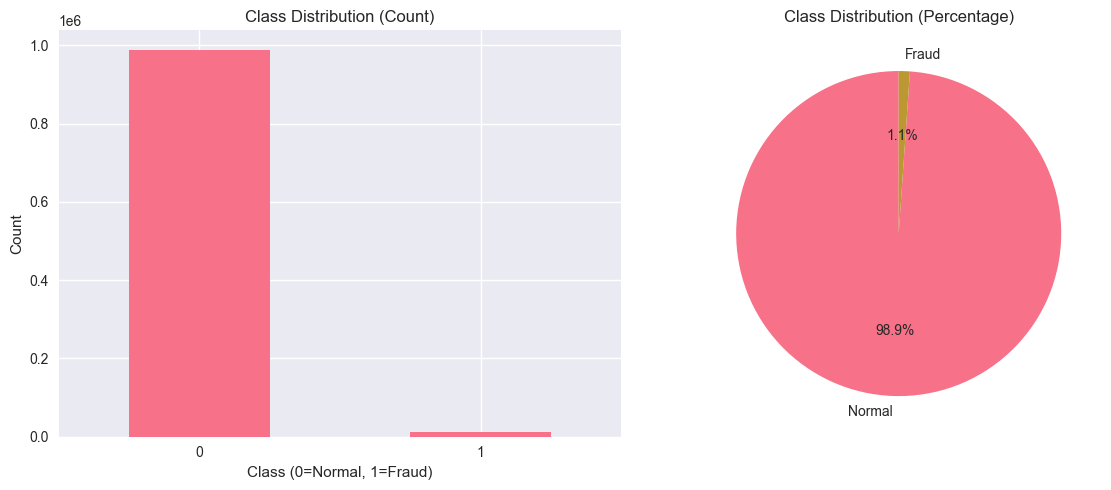

Imbalance Ratio: 89.7:1 (Normal:Fraud)
This dataset is highly imbalanced


In [5]:
# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
data['fraud_bool'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Class Distribution (Count)')
ax1.set_xlabel('Class (0=Normal, 1=Fraud)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
class_counts = data['fraud_bool'].value_counts()
ax2.pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
normal_count = (data['fraud_bool'] == 0).sum()
fraud_count = (data['fraud_bool'] == 1).sum()
imbalance_ratio = normal_count / fraud_count

print(f"Imbalance Ratio: {imbalance_ratio:.1f}:1 (Normal:Fraud)")
print(f"This dataset is {'highly' if imbalance_ratio > 10 else 'moderately'} imbalanced")

## 4. Feature Distribution Analysis

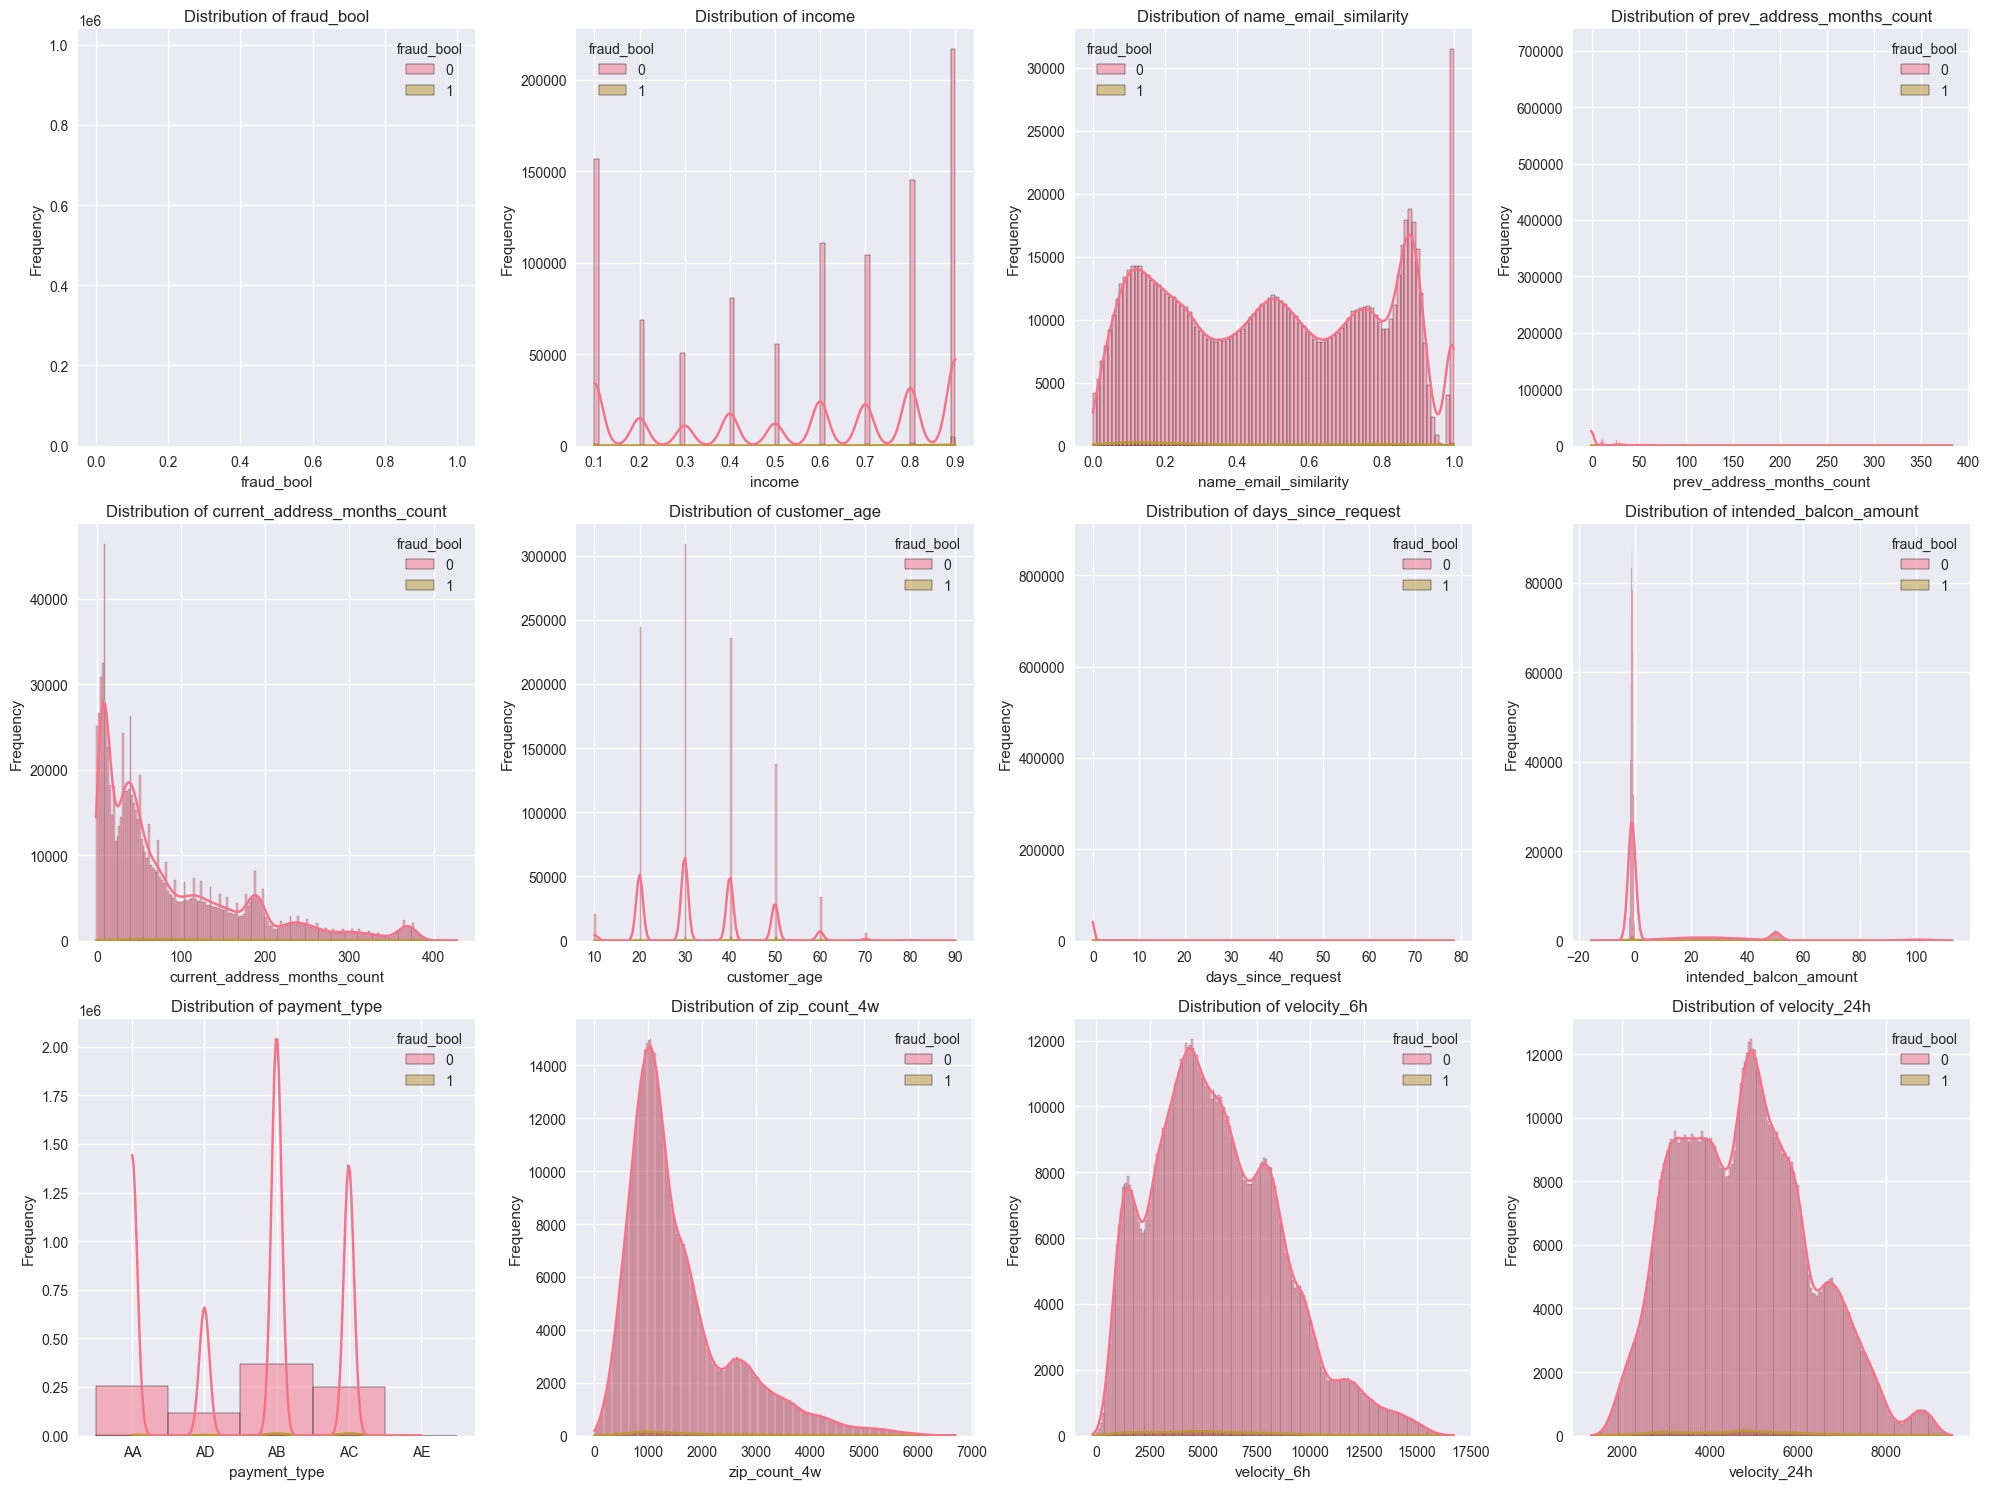

In [6]:
# Plot feature distributions
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Create a grid for 12 features
axes = axes.flatten()

for i, feature in enumerate(data.columns[:12]):  # First 12 features
    sns.histplot(data=data, x=feature, hue='fraud_bool', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

Correlation with Target Variable (fraud_bool):
fraud_bool                          1.000000
credit_risk_score                   0.070624
proposed_credit_limit               0.068907
customer_age                        0.062959
device_os                           0.057834
income                              0.045079
device_distinct_emails_8w           0.035704
current_address_months_count        0.033701
payment_type                        0.028304
email_is_free                       0.027758
foreign_request                     0.016885
month                               0.013250
session_length_in_minutes           0.008999
zip_count_4w                        0.005212
source                              0.003922
days_since_request                  0.000567
bank_months_count                  -0.003222
velocity_24h                       -0.011183
velocity_4w                        -0.011536
bank_branch_count_8w               -0.011577
phone_mobile_valid                 -0.013180
velocity

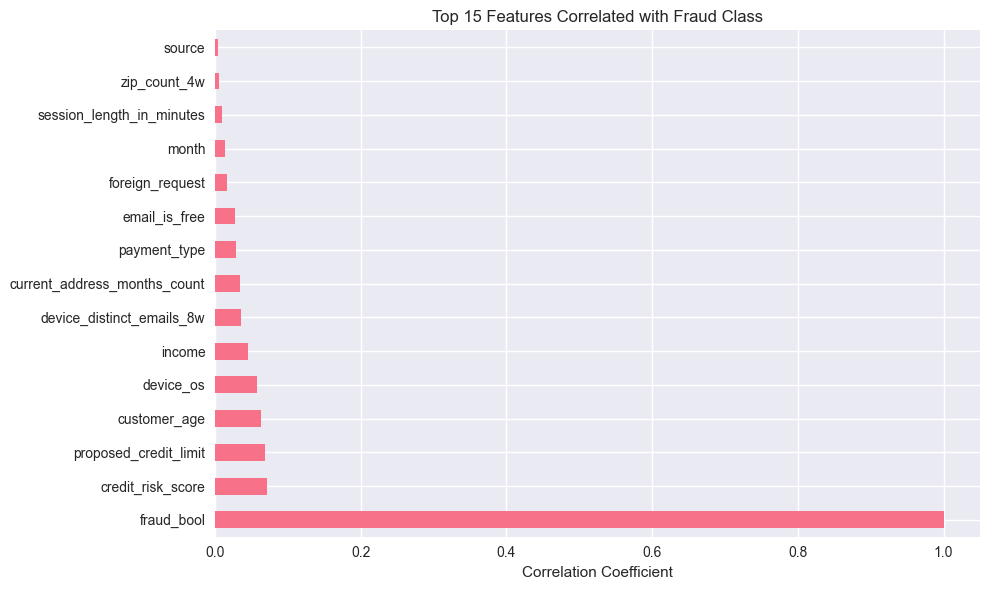

In [10]:
# Encode categorical features
data_encoded = data.copy()
for col in data_encoded.select_dtypes(include=['object', 'category']).columns:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# Now calculate correlation with target variable
correlations_with_target = data_encoded.corr()['fraud_bool'].sort_values(ascending=False)
print("Correlation with Target Variable (fraud_bool):")
print(correlations_with_target[:-1])  # Exclude self-correlation

# Plot top correlated features
plt.figure(figsize=(10, 6))
top_correlations = correlations_with_target[:-1].iloc[:15]  # Top 15 features
top_correlations.plot(kind='barh')
plt.title('Top 15 Features Correlated with Fraud Class')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Feature Correlation Matrix (Top 15 Correlated Features)')

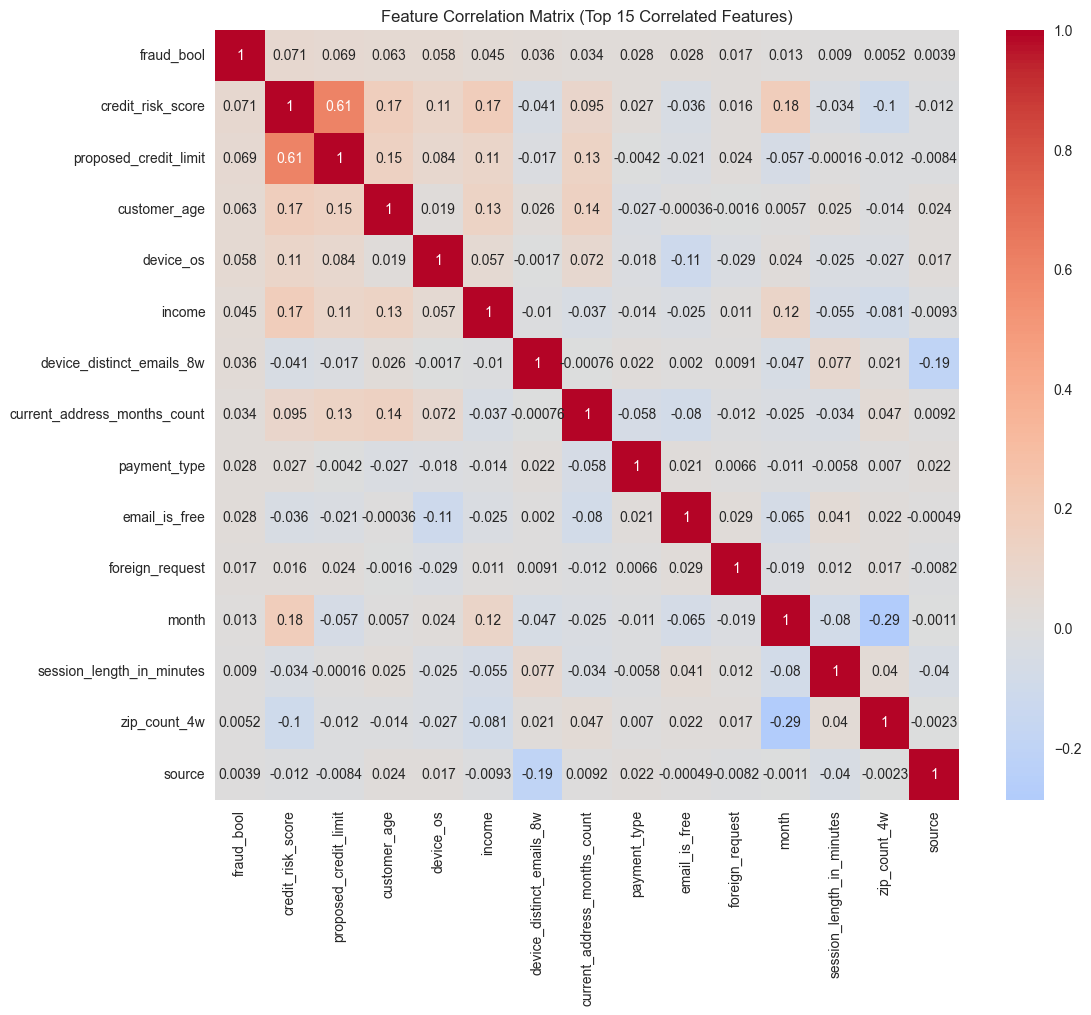

In [14]:
# Feature correlation matrix (top 15 correlated features only)
top15_features = correlations_with_target[:-1].iloc[:15].index
corr_matrix_top15 = data_encoded[top15_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_top15, annot=True, cmap='coolwarm', center=0,
            xticklabels=top15_features,
            yticklabels=top15_features)
plt.title('Feature Correlation Matrix (Top 15 Correlated Features)')

## 6. Statistical Analysis by Class

In [15]:
# Compare statistics between normal and fraud cases
normal_stats = data[data['fraud_bool'] == 0].describe()
fraud_stats = data[data['fraud_bool'] == 1].describe()

print("Normal Transactions - Statistics:")
print(normal_stats.iloc[:, :5])  # First 5 features

print("\nFraud Transactions - Statistics:")
print(fraud_stats.iloc[:, :5])  # First

Normal Transactions - Statistics:
       fraud_bool         income  name_email_similarity  \
count    988971.0  988971.000000          988971.000000   
mean          0.0       0.561313               0.494815   
std           0.0       0.290309               0.288855   
min           0.0       0.100000               0.000001   
25%           0.0       0.300000               0.226963   
50%           0.0       0.600000               0.493571   
75%           0.0       0.800000               0.756211   
max           0.0       0.900000               0.999999   

       prev_address_months_count  current_address_months_count  
count              988971.000000                 988971.000000  
mean                   16.839647                     86.273232  
std                    44.140319                     88.389648  
min                    -1.000000                     -1.000000  
25%                    -1.000000                     19.000000  
50%                    -1.000000            

## 7. Missing Values and Data Quality

In [18]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Feature:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")

# Check for infinite values
infinite_values = np.isinf(data.select_dtypes(include=[np.number])).sum().sum()
print(f"\nInfinite values: {infinite_values}")

# Check data types
print("\nData Types:")
print(data.dtypes.value_counts())

Missing Values per Feature:
Series([], dtype: int64)
✓ No missing values found in the dataset

Infinite values: 0

Data Types:
int64      18
float64     9
object      5
Name: count, dtype: int64


## 8. Feature Range Analysis

Feature Ranges (First 10 features):
                                       Min          Max        Range  \
fraud_bool                    0.000000e+00     1.000000     1.000000   
income                        1.000000e-01     0.900000     0.800000   
name_email_similarity         1.434550e-06     0.999999     0.999998   
prev_address_months_count    -1.000000e+00   383.000000   384.000000   
current_address_months_count -1.000000e+00   428.000000   429.000000   
customer_age                  1.000000e+01    90.000000    80.000000   
days_since_request            4.036860e-09    78.456904    78.456904   
intended_balcon_amount       -1.553055e+01   112.956928   128.487483   
payment_type                  0.000000e+00     4.000000     4.000000   
zip_count_4w                  1.000000e+00  6700.000000  6699.000000   

                                      Std  
fraud_bool                       0.104438  
income                           0.290343  
name_email_similarity            0.2891

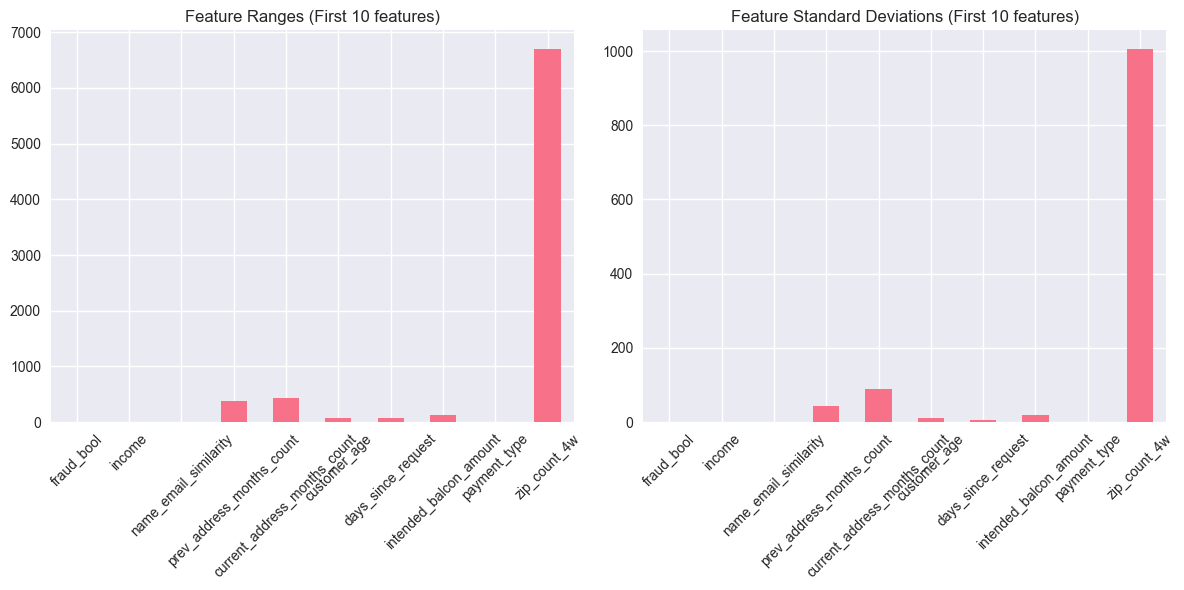

In [20]:
# Analyze feature ranges
feature_ranges = pd.DataFrame({
    'Min': data_encoded.min(axis=0),
    'Max': data_encoded.max(axis=0),
    'Range': data_encoded.max(axis=0) - data_encoded.min(axis=0),
    'Std': data_encoded.std(axis=0)
}, index=data_encoded.columns)

print("Feature Ranges (First 10 features):")
print(feature_ranges.head(10))

# Plot feature ranges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
feature_ranges['Range'][:10].plot(kind='bar')
plt.title('Feature Ranges (First 10 features)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
feature_ranges['Std'][:10].plot(kind='bar')
plt.title('Feature Standard Deviations (First 10 features)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 9. Outlier Detection

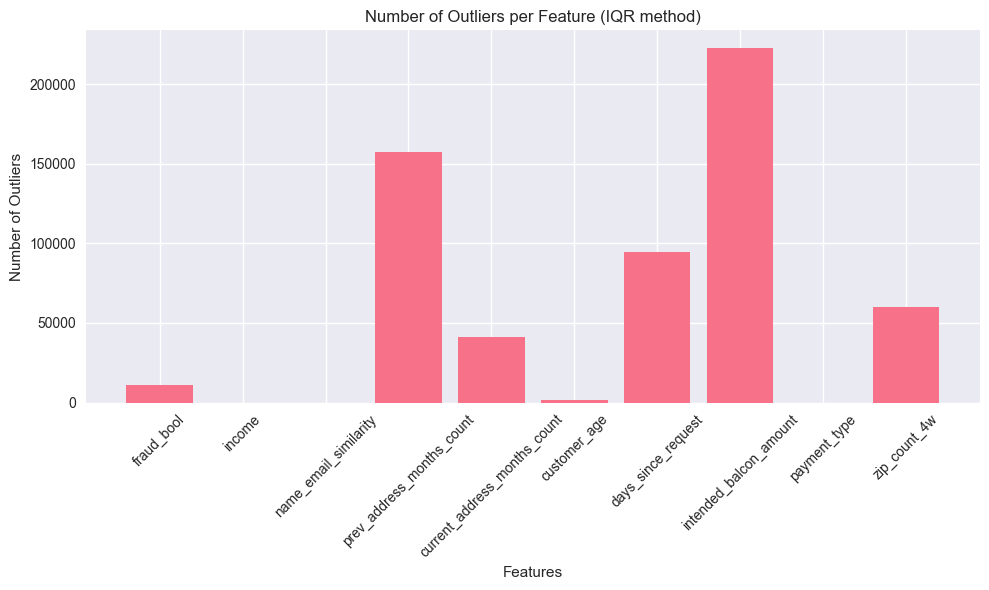

Total outliers detected: 588130
Percentage of outliers: 58.81%


In [21]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, feature_name):
    Q1 = np.percentile(data[feature_name], 25)
    Q3 = np.percentile(data[feature_name], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[feature_name] < lower_bound) | (data[feature_name] > upper_bound)
    return outliers.sum()

# Calculate outliers for first 10 features
first_10_features = data_encoded.columns[:10]
outlier_counts = [detect_outliers_iqr(data_encoded, feature) for feature in first_10_features]

plt.figure(figsize=(10, 6))
plt.bar(first_10_features, outlier_counts)
plt.title('Number of Outliers per Feature (IQR method)')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total outliers detected: {sum(outlier_counts)}")
print(f"Percentage of outliers: {sum(outlier_counts) / len(data_encoded) * 100:.2f}%")

## 10. Summary and Recommendations

In [23]:
print("=" * 50)
print("DATA EXPLORATION SUMMARY")
print("=" * 50)

print(f"\n📊 Dataset Overview:")
print(f"   • Samples: {data.shape[0]:,}")
print(f"   • Features: {data.shape[1]}")
print(f"   • Fraud Rate: {data['fraud_bool'].mean():.3f} ({int(data['fraud_bool'].sum()):,} fraud cases)")
print(f"   • Imbalance Ratio: {imbalance_ratio:.1f}:1")

print(f"\n🔍 Data Quality:")
print(f"   • Missing Values: {missing_values.sum()}")
print(f"   • Infinite Values: {infinite_values}")
print(f"   • Outliers: {sum(outlier_counts):,} ({sum(outlier_counts) / len(data_encoded) * 100:.1f}%)")

print(f"\n📈 Feature Characteristics:")
print(f"   • Mean correlation with target: {abs(correlations_with_target[:-1]).mean():.3f}")
print(f"   • Highest correlation: {abs(correlations_with_target[:-1]).max():.3f}")
print(f"   • Feature range variation: {feature_ranges['Range'].std():.2f}")

print("=" * 50)

DATA EXPLORATION SUMMARY

📊 Dataset Overview:
   • Samples: 1,000,000
   • Features: 32
   • Fraud Rate: 0.011 (11,029 fraud cases)
   • Imbalance Ratio: 89.7:1

🔍 Data Quality:
   • Missing Values: 0
   • Infinite Values: 0
   • Outliers: 588,130 (58.8%)

📈 Feature Characteristics:
   • Mean correlation with target: 0.061
   • Highest correlation: 1.000
   • Feature range variation: 3451.72
